In [27]:
import numpy as np
from matplotlib import pyplot as plt

# Directory:
# dir = 'not-flipped/'
# dir = 'flipped/'
# dir = 'single-coil/'
dir = 'build-channel/'

# Load data from output txt file:
data = np.loadtxt(dir+'AllTracks.txt')

# Select event ID:
# eventID = -2 # reference
eventID = 1 # with initial conditions

### SET CONFIG PARAMS ###

# Number of solenoids in sim:
# n = 1
n = 18

# Distance between coil centers (mm):
d = 400

# Length of coil (mm):
L = 100

In [28]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
r_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
Lz_vals = []
for i in range(data.shape[0]):
    id = data[i][8]
    if id == eventID:
        z = data[i][2] # mm
        if z < 500+d*n: # remove final solenoids (for reducing edge field effects)
            x = data[i][0]; y = data[i][1] # mm
            x_vals.append(x)
            y_vals.append(y)
            z = data[i][2] # mm
            z_vals.append(z)
            r = np.sqrt(x**2+y**2)
            r_vals.append(r)
            px = data[i][3]; py = data[i][4]; pz = data[i][5] # MeV/c
            px_vals.append(px)
            py_vals.append(py)
            pz_vals.append(pz)
            ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
            t_vals.append(data[i][6]) # ns
            Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
            Bx_vals.append(Bx)
            By_vals.append(By)
            Bz_vals.append(Bz)
            Lz = x*py-y*px
            Lz_vals.append(Lz)
            del px, py, pz, Bx, By, Bz


In [29]:
# Define function to plot lines indicating solenoid centers:
def plot_solenoids(n):
    for i in range(n):
        plt.axvline(x=500+i*d,color='black',alpha=0.1)

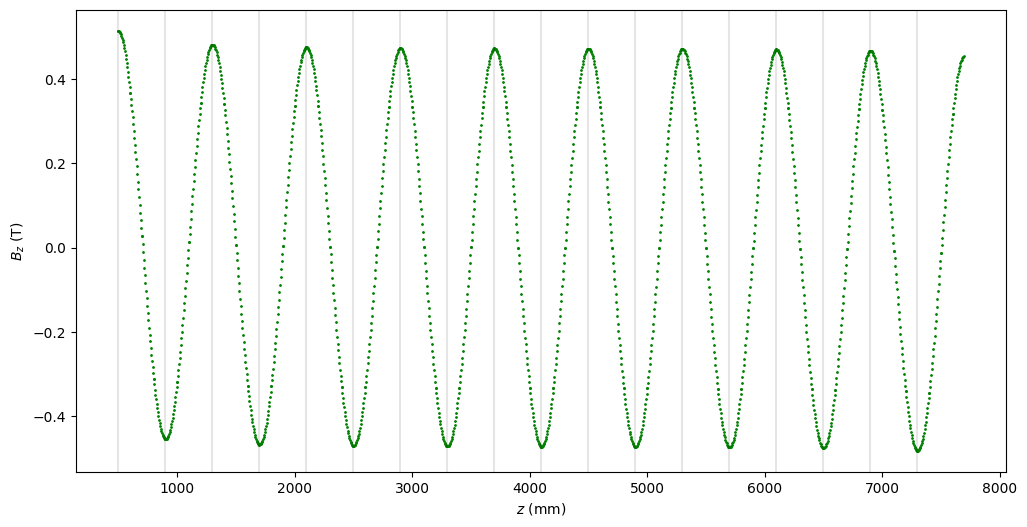

In [30]:
# Plot Bz along z:
plt.figure(figsize = (12,6))
plot_solenoids(n)
plt.scatter(z_vals,Bz_vals,color='green',s=1)
plt.xlabel('$z$ (mm)')
plt.ylabel('$B_z$ (T)')
# plt.savefig(dir+'Bz.png',dpi=300)
plt.show()

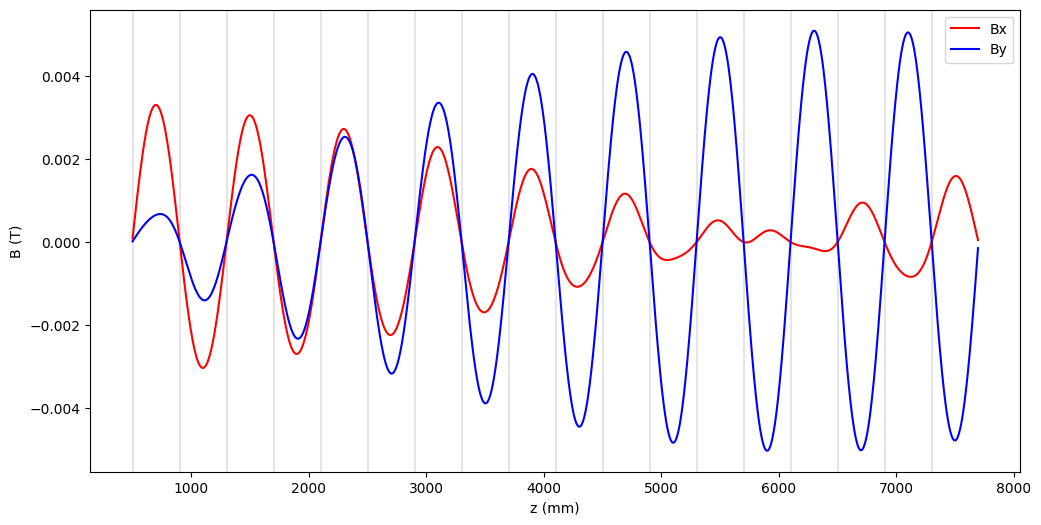

In [31]:
# Plot Bx, By along z:
plt.figure(figsize = (12,6))
plot_solenoids(n)
# plt.scatter(z_vals,Bx_vals,color='red',label='Bx',s=0.1)
# plt.scatter(z_vals,By_vals,color='blue',label='By',s=0.1)
plt.plot(z_vals,Bx_vals,color='red',label='Bx')
plt.plot(z_vals,By_vals,color='blue',label='By')
plt.xlabel('z (mm)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

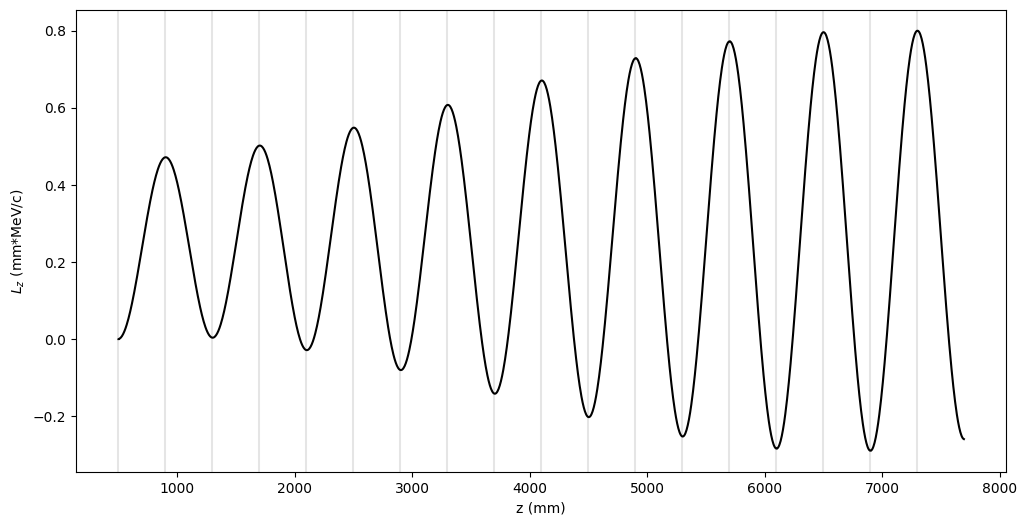

In [32]:
# Plot Lz along z:
plt.figure(figsize = (12,6))
plot_solenoids(n)
# plt.scatter(z_vals,Lz_vals,color='black',s=0.1)
plt.plot(z_vals,Lz_vals,color='black')
plt.xlabel('z (mm)')
plt.ylabel('$L_z$ (mm*MeV/c)')
plt.show()

In [33]:
# Find min and max Lz:
min_Lz = np.min(Lz_vals)
max_Lz = np.max(Lz_vals)
print(f'Minimum L_z: {min_Lz}')
print(f'Maximum L_z: {max_Lz}')

Minimum L_z: -0.2895346981825
Maximum L_z: 0.7995862190394001


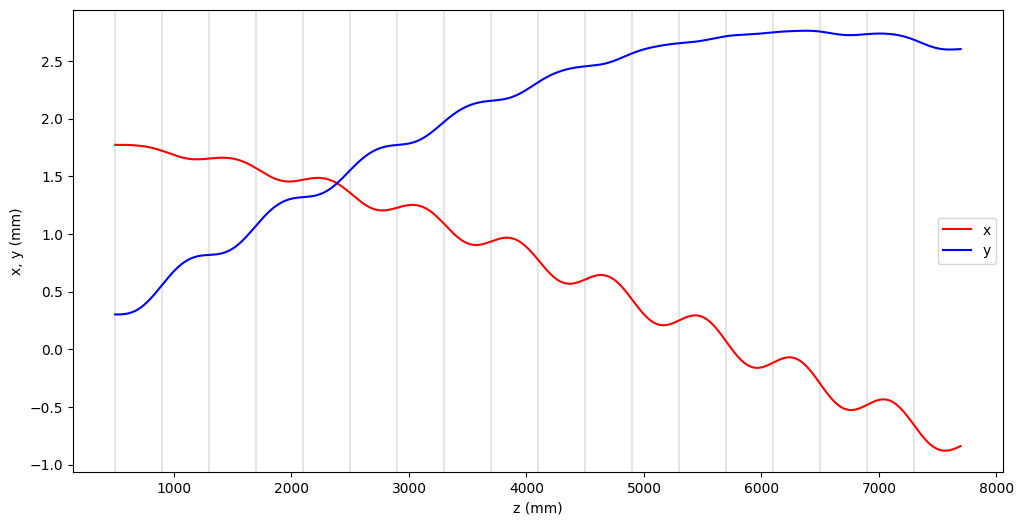

In [34]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
plot_solenoids(n)
# plt.scatter(z_vals,x_vals,color='red',label='x',s=0.1)
# plt.scatter(z_vals,y_vals,color='blue',label='y',s=0.1)
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('z (mm)')
plt.ylabel('x, y (mm)')
plt.legend()
plt.show()

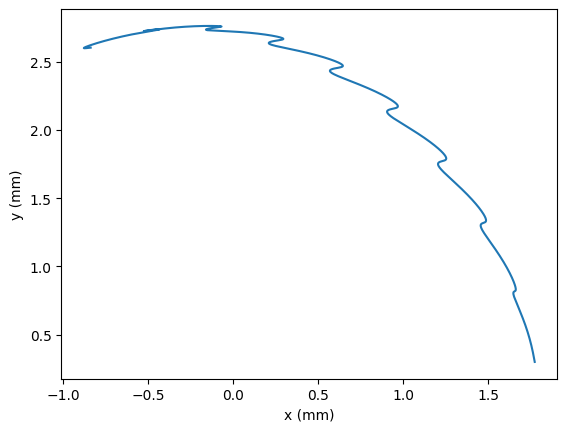

In [35]:
# Plot projection in x-y plane:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

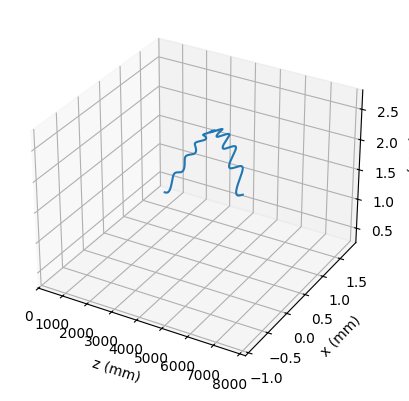

In [36]:
# 3D plot of trajectory:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
plt.show()

In [37]:
# # Plot x along z:
# plt.figure(figsize = (12,6))
# plt.axhline(y=0,color='black',alpha=0.3)
# plt.scatter(z_vals,x_vals,s=0.1)
# plt.xlabel('z (mm)')
# plt.ylabel('x (mm)')
# plt.show()

In [38]:
# # Compute focusing length from simulation:
# count1 = 0; count2 = 0
# for i in range(len(z_vals)):
#     if abs(x_vals[i]) < 0.001 and count1 == 0: # x = 0
#         end_f_index = i
#         count1 += 1
#     if z_vals[i] > 500 and count2 == 0: # z = 500mm (coil center)
#         start_f_index = i
#         count2 += 1
# f = z_vals[end_f_index] - z_vals[start_f_index] # mm
# print(f'f = {np.round(f,10)} mm')

In [39]:
# Estimate focusing length from formula given by Katsuya:
p = 200e-3 # GeV
m = 105.7e-3 # GeV
e = 0.303
gamma = np.sqrt(1+(p/m)**2)
peak_Bz = np.max(Bz_vals)
f = 2*gamma*m/(e*peak_Bz) # m
f = f*1000 # m --> mm
print(f'f = {np.round(f,10)} mm')

f = 2903.9814688903 mm


In [40]:
# Estimate focusing length from formula in Fernow paper:
p = 200e-3 # GeV
m = 105.7e-3 # GeV
e = 0.303
peak_Bz = np.max(Bz_vals)
f = (4*p**2)/(e**2*peak_Bz**2*L) # mm
print(f'f = {np.round(f,10)} mm')

f = 0.0659190778 mm


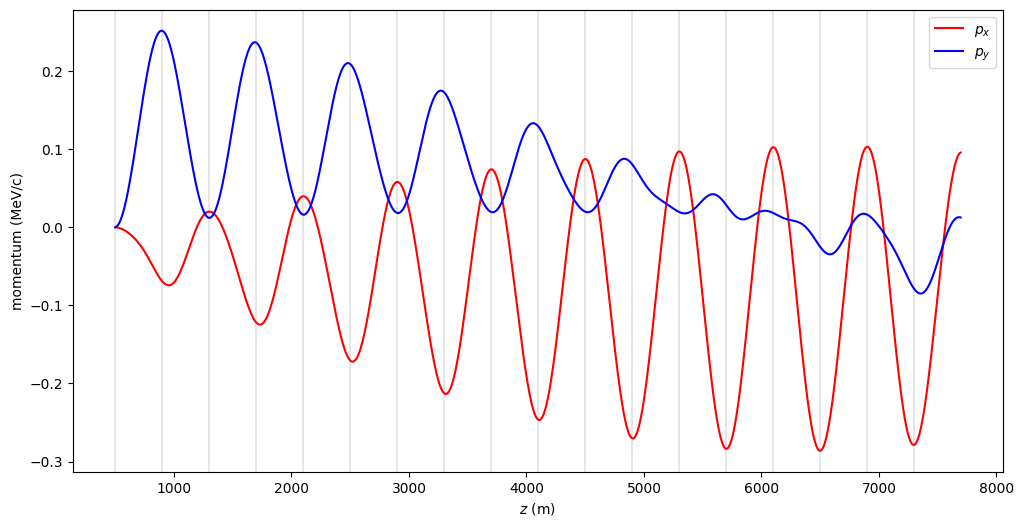

In [41]:
# Plot px, py along z:
plt.figure(figsize = (12,6))
plot_solenoids(n)
# plt.scatter(z_vals,px_vals,s=0.1,label='$p_x$',color='red')
# plt.scatter(z_vals,py_vals,s=0.1,label='$p_y$',color='blue')
plt.plot(z_vals,px_vals,label='$p_x$',color='red')
plt.plot(z_vals,py_vals,label='$p_y$',color='blue')
plt.ylabel('momentum (MeV/c)')
plt.xlabel('$z$ (m)')
plt.legend()
plt.show()

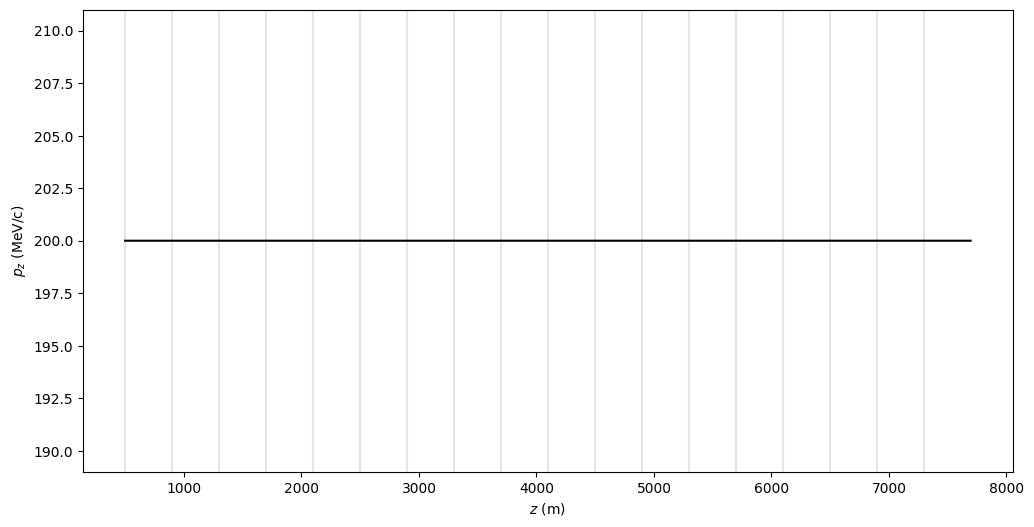

In [42]:
# Plot pz along z:
plt.figure(figsize = (12,6))
plot_solenoids(n)
# plt.scatter(z_vals,pz_vals,s=0.1,label='$p_z$',color='black')
plt.plot(z_vals,pz_vals,label='$p_z$',color='black')
plt.ylabel('$p_z$ (MeV/c)')
plt.xlabel('$z$ (m)')
plt.show()

In [43]:
# Calculate phase advance:
p = 200e-3 # GeV
m = 105.7e-3 # GeV
e = 0.303
gamma = np.sqrt(1+(p/m)**2)
beta = p/m/gamma
peak_Bz = np.max(Bz_vals)
phi = e*peak_Bz/(2*m*gamma*beta) # rad
phi = phi*180/np.pi # --> deg
print(f'phi = {phi}')

phi = 22.316036905640846


In [44]:
# Compute B_r along channel -- from analytical approximation for untilted solenoids:
Br_vals = []
for i in range(len(z_vals)-1):
    x = x_vals[i]; y = y_vals[i]; z = z_vals[i]
    Bx = Bx_vals[i]; By = By_vals[i]; Bz = Bz_vals[i]
    r = np.sqrt(x**2+y**2)
    deltaBz = Bz_vals[i+1] - Bz
    deltaz = z_vals[i+1] - z
    if deltaz != 0:
        dBz_dz = deltaBz / deltaz
        Br = -r/2*dBz_dz
        Br_vals.append(Br)
    else:
        Br_vals.append(np.nan)
Br_vals.append(np.nan)

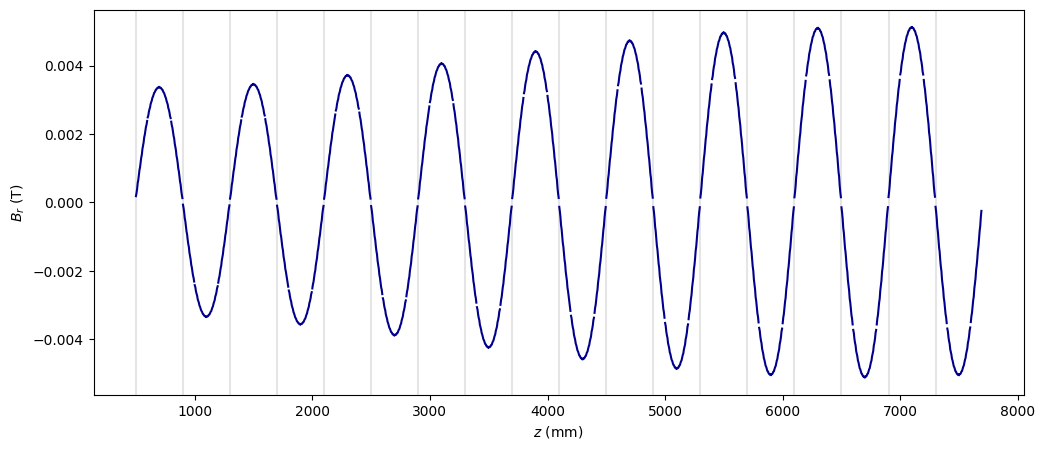

In [45]:
# Plot B_r vs. z:
plt.figure(figsize=(12,5))
plot_solenoids(n)
# plt.scatter(z_vals,Br_vals,s=0.5,color='darkblue')
plt.plot(z_vals,Br_vals,color='darkblue')
plt.ylabel('$B_r$ (T)')
plt.xlabel('$z$ (mm)')
plt.show()

In [46]:
# Compute B_r and B_phi along channel -- from geometrical definitions:
Br_vals2 = []; Bphi_vals = []
for i in range(len(z_vals)-1):
    x = x_vals[i]; y = y_vals[i]; z = z_vals[i]
    Bx = Bx_vals[i]; By = By_vals[i]; Bz = Bz_vals[i]
    r = np.sqrt(x**2+y**2)
    theta = np.cos(x/r)
    Br = Bx*np.cos(theta) + By*np.sin(theta)
    Bphi = Bx*np.sin(theta) + By*np.cos(theta)
    Br_vals2.append(Br)
    Bphi_vals.append(Bphi)
Br_vals2.append(np.nan)
Bphi_vals.append(np.nan)

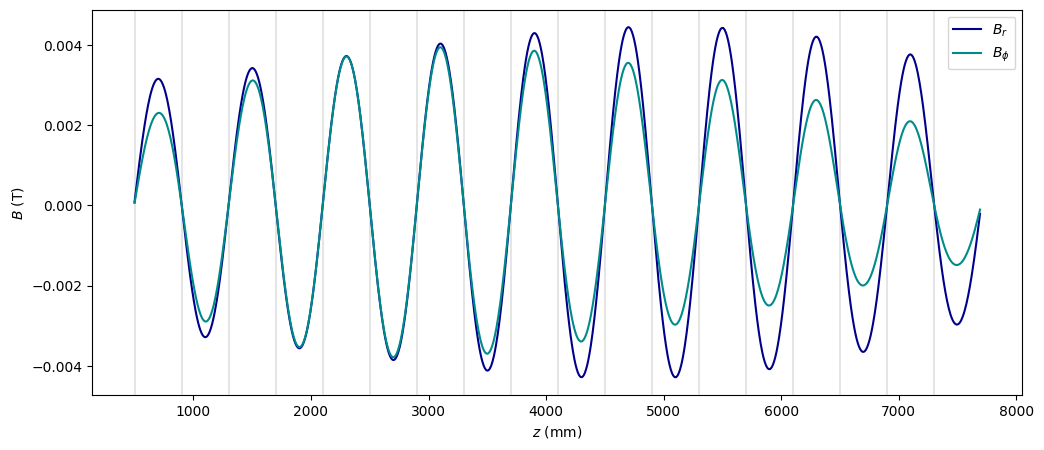

In [47]:
# Plot B_r and B_phi vs. z:
plt.figure(figsize=(12,5))
plot_solenoids(n)
# plt.scatter(z_vals,Br_vals2,s=0.5,color='darkblue',label='$B_r$')
# plt.scatter(z_vals,Bphi_vals,s=0.5,color='darkcyan',label='$B_{\phi}$')
plt.plot(z_vals,Br_vals2,color='darkblue',label='$B_r$')
plt.plot(z_vals,Bphi_vals,color='darkcyan',label='$B_{\phi}$')
plt.legend()
plt.ylabel('$B$ (T)')
plt.xlabel('$z$ (mm)')
plt.show()

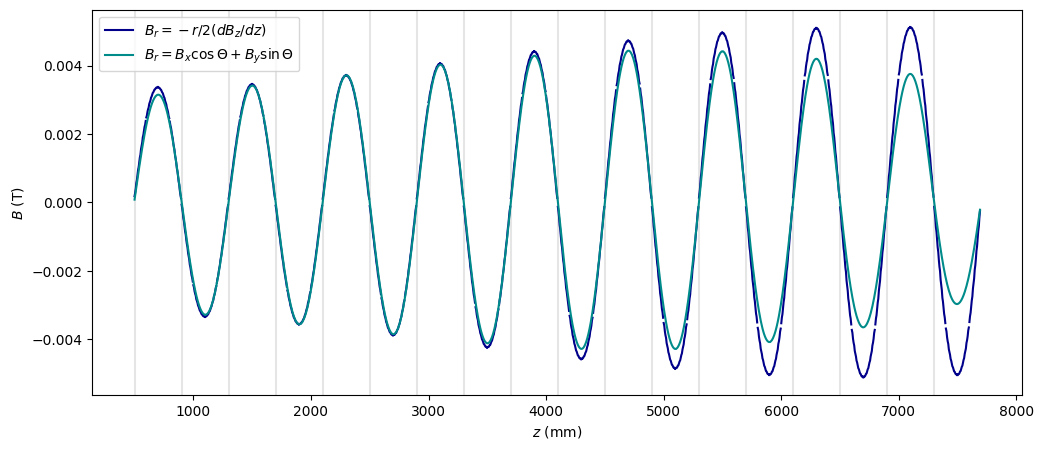

In [48]:
# Plot B_r vs. z from both approaches:
plt.figure(figsize=(12,5))
plot_solenoids(n)
# plt.scatter(z_vals,Br_vals,s=0.5,label='$ B_r = -r/2 (dB_z/dz) $')
# plt.scatter(z_vals,Br_vals2,s=0.5,label='$ B_r = B_x \cos\Theta + B_y \sin\Theta $')
plt.plot(z_vals,Br_vals,label='$ B_r = -r/2 (dB_z/dz) $',color='darkblue')
plt.plot(z_vals,Br_vals2,label='$ B_r = B_x \cos\Theta + B_y \sin\Theta $',color='darkcyan')
plt.legend()
plt.ylabel('$B$ (T)')
plt.xlabel('$z$ (mm)')
plt.show()